In [1]:
import os
os.chdir('/pc_win_loss')

In [2]:
import warnings
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.visualizer import *
from src.config import *

![](images/train_test_col_explain.png)
![](images/sample_submit_col_explain.png)

In [3]:
df_train = pd.read_csv('input/train.csv')
df_train.head()

,gameId,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueWins
0,0,0,5,8,6,0,0,14536,17256,0
1,1,1,10,1,5,0,0,14536,17863,0
2,2,0,3,10,2,0,0,17409,17256,0
3,3,1,7,10,8,0,0,19558,18201,0
4,4,0,4,9,4,0,0,17409,17256,0


In [4]:
df_train.describe(include='all')

,gameId,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueWins
count,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4983.683000,0.513000,6.029750,5.92350,5.881875,0.538625,0.358125,17154.067750,17983.514000,0.491750
std,2893.028418,0.499862,2.623876,2.64892,3.189897,0.629728,0.479479,1820.796171,772.348402,0.499963
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13475.000000,16650.000000,0.000000
25%,2473.750000,0.000000,4.000000,4.00000,3.000000,0.000000,0.000000,16544.000000,17256.000000,0.000000
50%,4985.500000,1.000000,6.000000,6.00000,6.000000,0.000000,0.000000,17409.000000,18021.000000,0.000000
75%,7493.250000,1.000000,8.000000,8.00000,8.000000,1.000000,1.000000,18274.000000,18472.000000,1.000000
max,9998.000000,1.000000,14.000000,14.00000,17.000000,2.000000,1.000000,20619.000000,20101.000000,1.000000


In [15]:
df_train.nunique()

gameId                 8000
blueFirstBlood            2
blueKills                15
blueDeaths               15
blueAssists              16
blueEliteMonsters         3
blueDragons               2
blueTotalGold            17
blueTotalExperience      29
blueWins                  2
dtype: int64

- 欠損値はなし

In [5]:
# hist_graph_visualizer(df_train, bins=20)

- blueTotalGoldが双峰性を示す


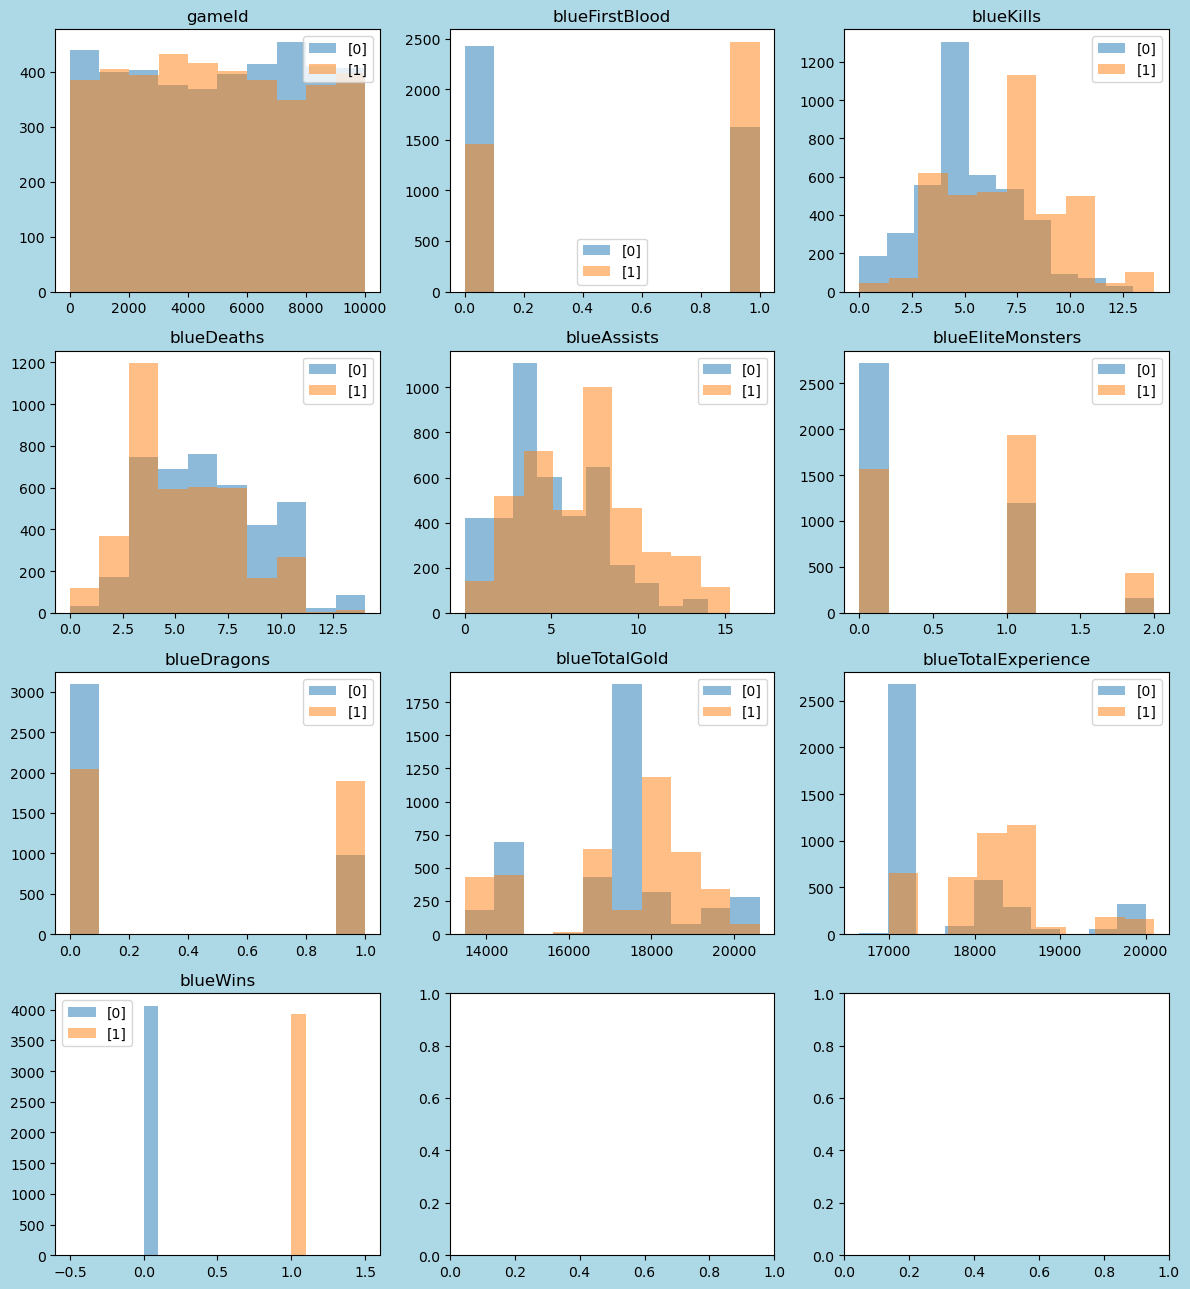

In [6]:
hist_graph_visualizer(df_train, hue_col_name=COL_BLUEWINS)

plt.scatter(df_train[COL_FIRSTBLOOD], df_train[COL_KILLS], alpha=0.01)
plt.show()

list_col = list(df_train.columns)
list_col

list_pair_col = [pair for pair in itertools.combinations(list_col, 2)]
list_pair_col

# 引数
graph_size = 4
c = 3
facecolor = 'lightblue'
alpha=0.1

# 可視化
num_graph = len(list_pair_col)

fig, ax = plt.subplots((num_graph//c)+1, c, 
                       figsize=(graph_size*c, graph_size*(num_graph//c)+1), 
                       facecolor=facecolor
                      )

for i, pair in enumerate(list_pair_col):
    x = pair[0]
    y = pair[1]
    ax[i//3, i%3].scatter(df_train[x], df_train[y], alpha=alpha)
    ax[i//3, i%3].set_xlabel(x)
    ax[i//3, i%3].set_ylabel(y)

fig.tight_layout()
plt.show()

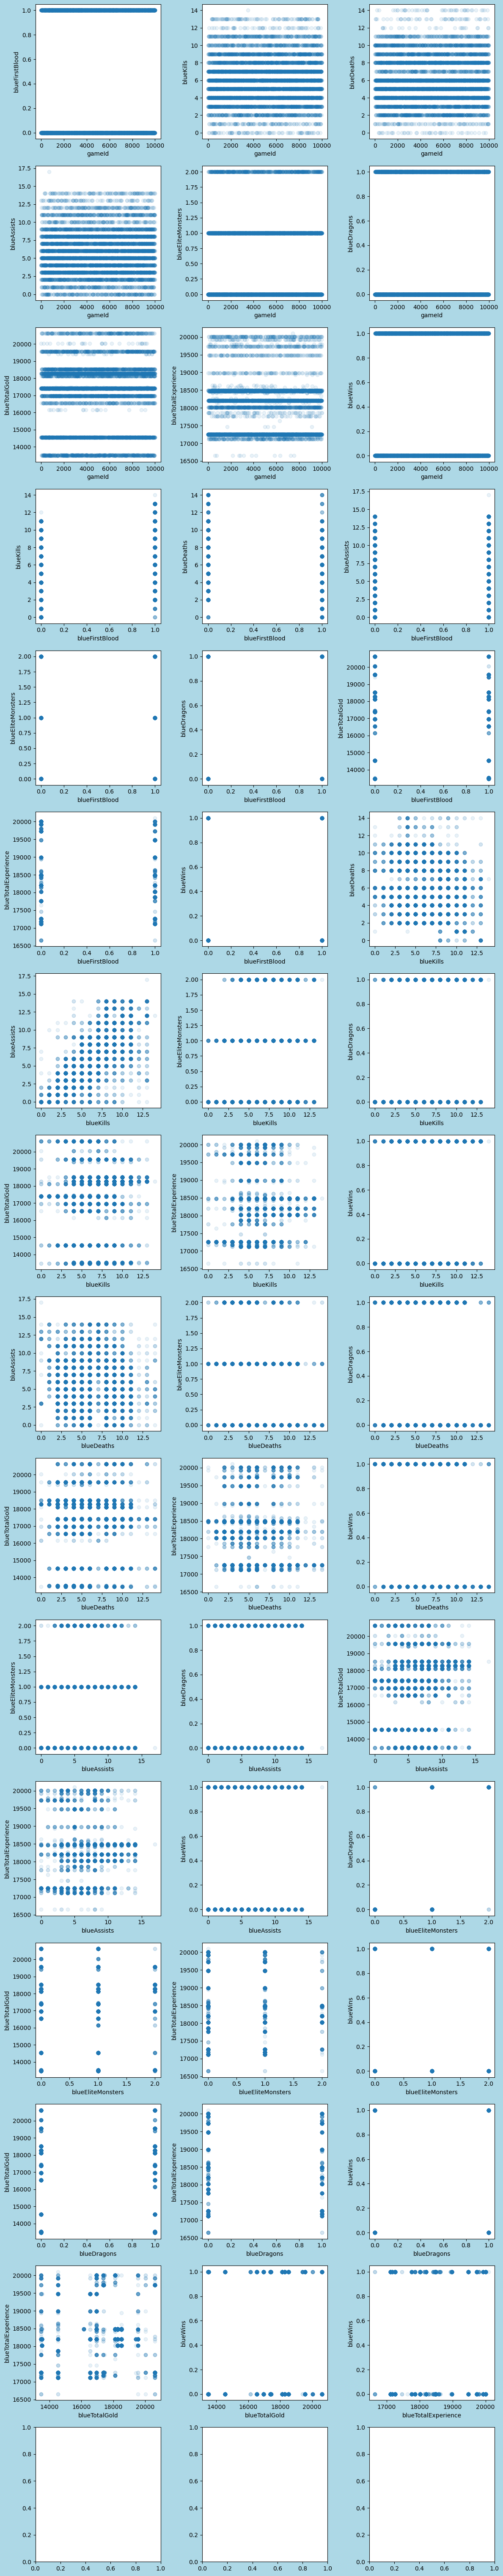

In [7]:
scatter_all_comb_visualizer(df_train)